In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [13]:
match_summary=pd.read_csv("X:/Data Science/Codebasics/C10_Input_Files/C10_Input_Files/datasets/dim_match_summary.csv")
match_summary.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942


In [14]:
player_info=pd.read_csv("X:/Data Science/Codebasics/C10_Input_Files/C10_Input_Files/datasets/dim_players.csv")
player_info.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [15]:
batting_summary=pd.read_csv("X:/Data Science/Codebasics/C10_Input_Files/C10_Input_Files/datasets/fact_bating_summary.csv")
batting_summary.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [16]:
bowling_summary=pd.read_csv("X:/Data Science/Codebasics/C10_Input_Files/C10_Input_Files/datasets/fact_bowling_summary.csv")
bowling_summary.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


## Primary Insights


#### 1. Top 10 batsmen based on past 3 years total runs scored.

In [17]:
batting_summary.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [22]:
# Using pandas str.replace to add spaces before uppercase letters (no function needed)
batting_summary['batsmanName'] = batting_summary['batsmanName'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)


In [28]:
batting_summary['batsmanName'] = batting_summary['batsmanName'].replace({
    'KLRahul': 'KL Rahul',
    "Fafdu Plessis":"Faf du Plessis"
    
})

In [29]:
top_10_batsman=batting_summary.groupby("batsmanName")["runs"].sum().reset_index().sort_values(by="runs",ascending=False).head(10)
top_10_batsman

,batsmanName,runs
222,Shubman Gill,1851
66,Faf du Plessis,1831
197,Ruturaj Gaikwad,1593
97,KL Rahul,1516
95,Jos Buttler,1509
216,Shikhar Dhawan,1392
251,Virat Kohli,1385
204,Sanju Samson,1304
230,Suryakumar Yadav,1225
69,Glenn Maxwell,1214


In [35]:
sns.set_theme(style="whitegrid")


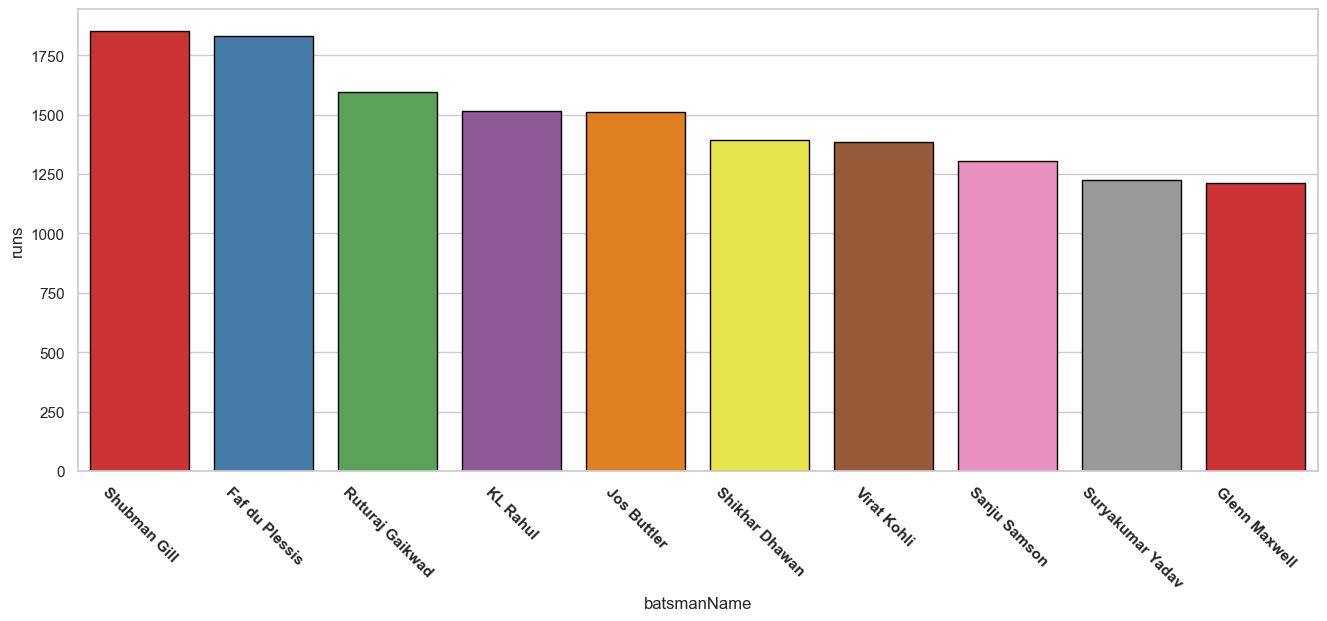

In [54]:
plt.figure(figsize=(16,6))
sns.barplot(data=top_10_batsman,x="batsmanName",y="runs",palette='Set1',edgecolor="black")
plt.xticks(rotation=-45, fontsize=11, fontweight='bold')
plt.show()

In [53]:
import plotly.express as px

fig = px.bar(
    top_10_batsman,
    x="batsmanName",
    y="runs",
    title="Top 10 batsmen based on past 3 years total runs scored",
    color="batsmanName",
    color_discrete_sequence=px.colors.qualitative.Set1
)


fig.update_layout(
    title=dict(text="Top 10 batsmen based on past 3 years total runs scored", font=dict(size=20, color='black', family='Arial', weight='bold')),
    xaxis_title='Batsman Name',
    yaxis_title='Runs',
    legend_title_text='Batsman Name:',
)


fig.show()
